In [1]:
import cv2 
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

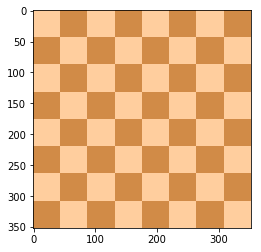

In [4]:
plt.imshow(flat_chess)

In [5]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

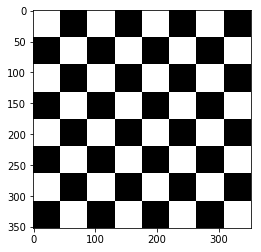

In [6]:
plt.imshow(gray_flat_chess, cmap='gray')

In [7]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

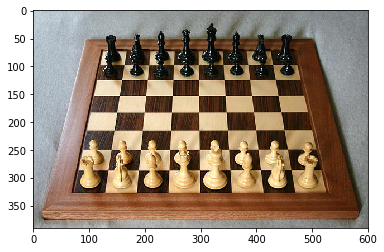

In [8]:
plt.imshow(real_chess)

In [9]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

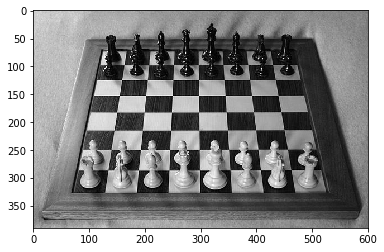

In [10]:
plt.imshow(gray_real_chess, cmap='gray')

In [11]:
#Harris Corner Detection
gray = np.float32(gray_flat_chess)

In [13]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [14]:
#Makes results visible for us
dst = cv2.dilate(dst, None)

In [15]:
#Wherever the value is 1% of the max value set pixel to red
flat_chess[dst>0.01*dst.max()] = [255,0,0]

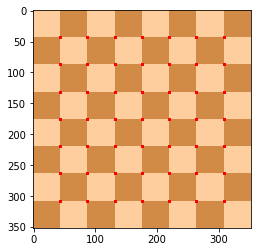

In [16]:
plt.imshow(flat_chess)

In [17]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [18]:
dst = cv2.dilate(dst, None)

In [19]:
real_chess[dst>0.01*dst.max()] = [255,0,0]

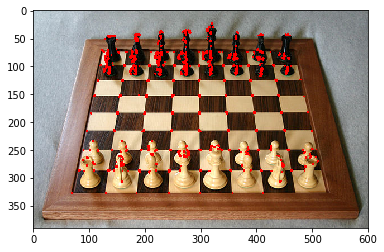

In [20]:
plt.imshow(real_chess)

In [21]:
#Shi-Tomasi Corner Detection

#Reload images
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [26]:
#find all corners by setting maxCorners = -1
corners = cv2.goodFeaturesToTrack(gray_flat_chess, maxCorners=64, qualityLevel=0.01, minDistance=10)

In [27]:
corners = np.int0(corners)

In [28]:
#Draw circles around corners
for i in corners:
    x,y = i.ravel()

    cv2.circle(flat_chess, center=(x,y), radius=3, color=(255,0,0), thickness=-1)

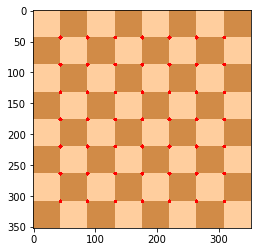

In [29]:
plt.imshow(flat_chess)

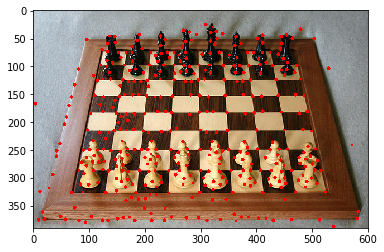

In [37]:
#find all corners by setting maxCorners = -1
corners = cv2.goodFeaturesToTrack(gray_real_chess, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)
#Draw circles around corners
for i in corners:
    x,y = i.ravel()

    cv2.circle(real_chess, center=(x,y), radius=3, color=(255,0,0), thickness=-1)
    
plt.imshow(real_chess)